# Weeks 3 & 4

- Joshua Burden
- Bellevue University
- DSC540 Data Preparation
- Cathrine Williams
- 06/12/2022


### Complete the following exercises. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.


# Data Wrangling with Python: Activity 5, page 116

Activity 5: Generating Statistics from a CSV File
1) Load the necessary libraries:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2) Read in the Boston housing dataset(given as a .csv file) from the local directory:

In [16]:
data = pd.read_csv("Boston_housing.csv")

3. Check the first 10 records. Find the total number of records:

In [17]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [18]:
print("total records (Rows, Columns): \n", data.shape)

total records (Rows, Columns): 
 (506, 14)


4) Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT:

In [19]:
housingDF = data.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis=1)

5) Check the last 7 records of the new DataFrame you just created:

In [20]:
housingDF.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


6) Plot the histograms of all the variables (columns) in the new DataFrame:

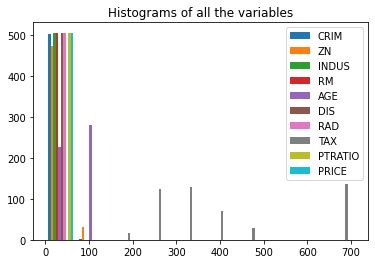

In [21]:
plt.hist(housingDF)
plt.title("Histograms of all the variables")
plt.legend(housingDF.columns)

7) Plot them all at once using a for loop. Try to add a unique title to a plot:

In [22]:
def plotHist(columnName):
    plt.hist(housingDF[columnName])
    plt.title(columnName)
    plt.show()

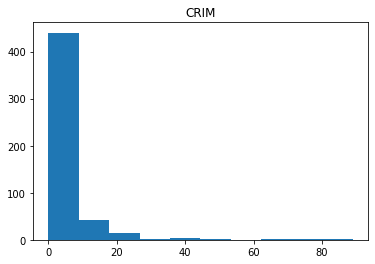

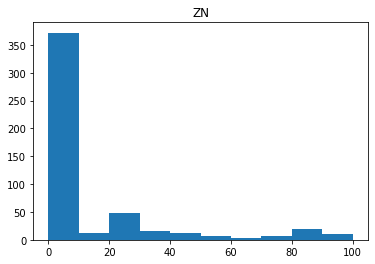

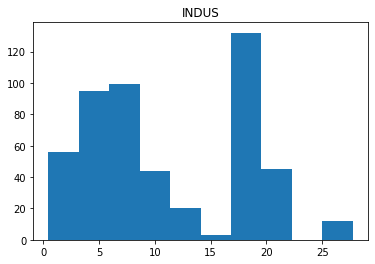

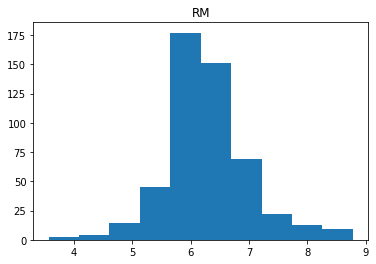

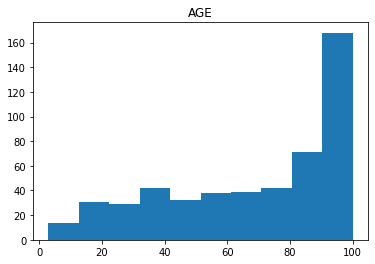

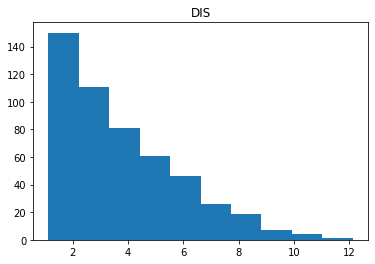

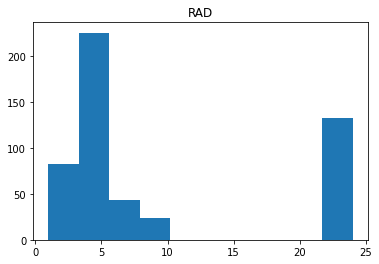

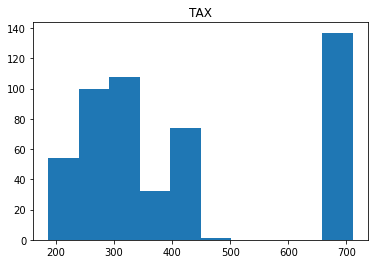

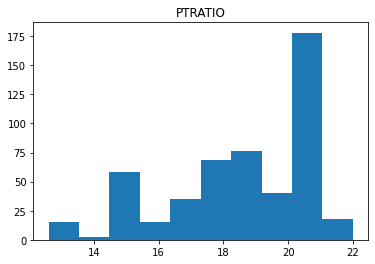

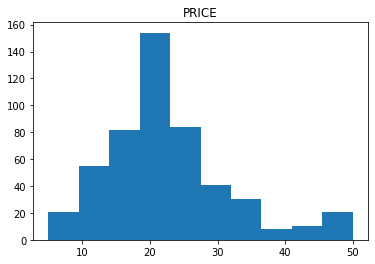

In [23]:
for i in housingDF.columns:
    plotHist(i)

8) Create a scatter plot of crime rate versus price:

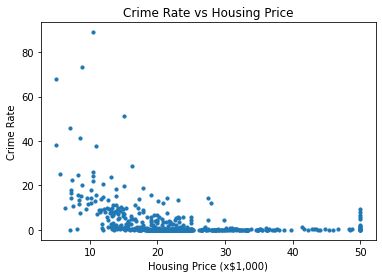

In [24]:
plt.scatter(housingDF.PRICE, housingDF.CRIM, s=10)
plt.title("Crime Rate vs Housing Price")
plt.xlabel("Housing Price (x$1,000)")
plt.ylabel("Crime Rate")
plt.show()

9) Plot using log10(crime) versus price:

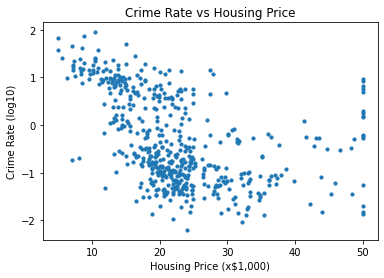

In [25]:
plt.scatter(housingDF.PRICE, np.log10(housingDF.CRIM), s=10)
plt.title("Crime Rate vs Housing Price")
plt.xlabel("Housing Price (x$1,000)")
plt.ylabel("Crime Rate (log10)")
plt.show()

10) Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distances to five Boston employment centers, and percentage of houses with a low price (< $20,000):

In [26]:
print("Mean rooms per dwelling:\n", round(housingDF['RM'].mean(), 2))
print("Median age:\n", housingDF['AGE'].median())
print("Mean distance to Boston unemployment centers:\n", round(housingDF['DIS'].mean(), 2))
print("Percentage of houses < $20,000:\n", round(((housingDF['PRICE']<20).mean()*100), 2))

Mean rooms per dwelling:
 6.28
Median age:
 77.5
Mean distance to Boston unemployment centers:
 3.8
Percentage of houses < $20,000:
 41.5


# Data Wrangling with Python: Activity 6, page 171

Activity 6: Working with the Adult Income Dataset (UCI)

1) Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib

2) Read the adult icome dataset from the following URL: https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Chapter04/Activity06

In [4]:
csvURL = 'https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Chapter04/Activity06/adult_income_data.csv?raw=true'
dfUCI = pd.read_csv(csvURL)

In [5]:
dfUCI.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


3) Create a script that will read a text file line by line

In [10]:
txtURL = "https://raw.githubusercontent.com/TrainingByPackt/Data-Wrangling-with-Python/master/Chapter04/Activity06/adult_income_names.txt"
with urllib.request.urlopen(txtURL) as f:
    text = f.read().decode('utf-8')
    textList = text.split()

In [15]:
headers = []
for word in textList:
    if word.endswith(":"):
        headers += [word[0:-1]]  
headers

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

4) Add a name of Income for the response to the dataset

In [16]:
headers += ['income']
headers

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [17]:
dfUCI = pd.read_csv(csvURL, names=headers)

In [18]:
dfUCI.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


5) Find the missing values

In [20]:
df_missing = dfUCI

In [22]:
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss > 0:
        print("{} has {} missing values".format(c, miss))
    else:
        print("{} has no missing values".format(c))

age has no missing values
workclass has no missing values
fnlwgt has no missing values
education has no missing values
education-num has no missing values
marital-status has no missing values
occupation has no missing values
relationship has no missing values
sex has no missing values
capital-gain has no missing values
capital-loss has no missing values
hours-per-week has no missing values
native-country has no missing values
income has no missing values


6) Create a DataFrame with only age, education, and occupation by using subsetting

In [23]:
keep_df = ['age', 'education', 'occupation']

In [25]:
subDF = dfUCI[keep_df]
subDF

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


7) Plot a histogram of age with a bin size of 20

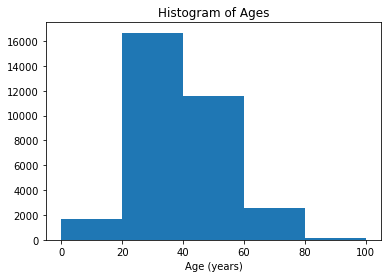

In [26]:
plt.hist(subDF['age'], bins=[0,20,40,60,80,100])
plt.title("Histogram of Ages")
plt.xlabel("Age (years)")
plt.show()

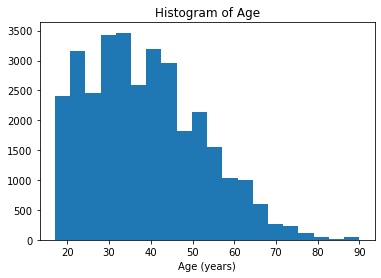

In [28]:
plt.hist(subDF['age'], bins=20)
plt.title("Histogram of Age")
plt.xlabel("Age (years)")
plt.show()

8) Create a funciton to strip the whitespace characters

In [36]:
def stripSpace(values):
    return values.strip()

9) Us the apply method to apply this funciton to all the columns with string values, create a new column, copy the values from this new coumn to the old column, and drop the new column

In [37]:
strCols = ['education', 'occupation']

In [38]:
newSubDF = subDF

In [39]:
def clean(col):
    newSubDF['tempClean'] = newSubDF[col].apply(stripSpace)
    newSubDF[col] = newSubDF['tempClean']
    newSubDF.drop(labels=['tempClean'], axis=1, inplace=True)

In [40]:
for i in strCols:
    clean(i)

/var/folders/ct/l8y_jb751b1ghqz7j4qhxv580000gn/T/ipykernel_40160/3388250203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newSubDF['tempClean'] = newSubDF[col].apply(stripSpace)
/var/folders/ct/l8y_jb751b1ghqz7j4qhxv580000gn/T/ipykernel_40160/3388250203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newSubDF[col] = newSubDF['tempClean']
/Users/joshua/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

10) Find the number of people who are aged between 30 and 50

In [41]:
filteredDF = newSubDF[(newSubDF['age'] >= 30) & (newSubDF['age'] <= 50)]

In [42]:
filteredDF

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
...,...,...,...
32550,43,Some-college,Craft-repair
32551,32,10th,Handlers-cleaners
32552,43,Assoc-voc,Sales
32553,32,Masters,Tech-support


In [43]:
print("There are", len(filteredDF), "people between the ages of 30 and 50.")

There are 16390 people between the ages of 30 and 50.


11) Group the records based on age and education to find how the mean age is distibuted

In [44]:
newSubDF.groupby(['education']).mean()

,age
education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443
Assoc-voc,38.553546


In [45]:
newSubDF.groupby(['age']).describe()

education                           occupation                          \
        count unique           top freq      count unique              top   
age                                                                          
17        395      8          11th  180        395     14    Other-service   
18        550      9          11th  166        550     14    Other-service   
19        712     13  Some-college  329        712     14    Other-service   
20        753     14  Some-college  413        753     14    Other-service   
21        720     14  Some-college  372        720     14    Other-service   
..        ...    ...           ...  ...        ...    ...              ...   
85          3      2       HS-grad    2          3      2            Sales   
86          1      1       Masters    1          1      1     Adm-clerical   
87          1      1       HS-grad    1          1      1                ?   
88          3      2   Prof-school    2          3      3   Prof-specialty   
90         43     11       HS-grad   14         43     12  Exec-managerial   

          
    freq  
age       
17   129  
18   152  
19   166  
20   139  
21   142  
..   ...  
85     2  
86     1  
87     1  
88     1  
90     8  

[73 rows x 8 columns]

12) Group by occupation and show the summary statistics of age Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile

In [49]:
newSubDF.groupby(['occupation']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


13) use subset and groupby to find outliers

In [54]:
occuAge = newSubDF.groupby('occupation').describe()['age']
occuAge

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [55]:
eduAge = newSubDF.groupby('education').describe()['age']
eduAge

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


14) Plot the values on a bar chart

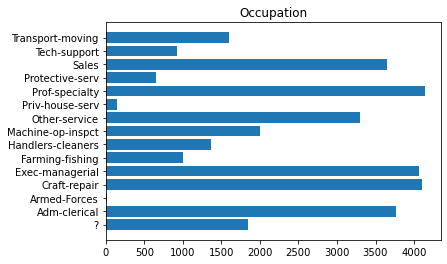

In [56]:
plt.barh(y=occuAge.index, width=occuAge['count'])
plt.title("Occupation")
plt.show()

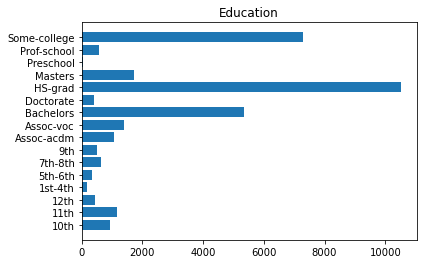

In [57]:
plt.barh(y=eduAge.index, width=eduAge['count'])
plt.title("Education")
plt.show()

15) Merge the data using common keys

In [58]:
merge_1 = newSubDF[['age', 'education', 'occupation']].sample(n=50)
merge_2 = newSubDF[['age', 'education', 'occupation']].sample(n=50)

In [63]:
merge_1.describe()

,age
count,50.00000
mean,37.58000
std,13.48028
min,17.00000
25%,24.25000
50%,36.50000
75%,47.00000
max,68.00000


In [66]:
innerJoin = pd.merge(merge_1, merge_2, on='education', how='inner').drop_duplicates()

In [67]:
innerJoin

,age_x,education,occupation_x,age_y,occupation_y
0,72,HS-grad,?,43,Sales
1,72,HS-grad,?,39,Other-service
2,72,HS-grad,?,19,Other-service
3,72,HS-grad,?,24,Other-service
4,72,HS-grad,?,39,Adm-clerical
...,...,...,...,...,...
482,46,11th,Machine-op-inspct,52,Machine-op-inspct
483,38,10th,Machine-op-inspct,17,?
484,38,10th,Machine-op-inspct,47,Craft-repair
485,38,10th,Machine-op-inspct,17,Handlers-cleaners


In [68]:
outerJoin = pd.merge(merge_1, merge_2, on='education', how='outer').drop_duplicates()

In [69]:
outerJoin

,age_x,education,occupation_x,age_y,occupation_y
0,72.0,HS-grad,?,43,Sales
1,72.0,HS-grad,?,39,Other-service
2,72.0,HS-grad,?,19,Other-service
3,72.0,HS-grad,?,24,Other-service
4,72.0,HS-grad,?,39,Adm-clerical
...,...,...,...,...,...
485,38.0,10th,Machine-op-inspct,17,Handlers-cleaners
486,38.0,10th,Machine-op-inspct,52,Machine-op-inspct
487,NaN,Prof-school,NaN,46,Prof-specialty
488,NaN,Prof-school,NaN,40,Other-service


# Create a series and practice basic arithmetic steps
1. Series 1 = 7.3, -2.5, 3.4, 1.5
1. Index = ‘a’, ‘c’, ‘d’, ‘e’
1. Series 2 = -2.1, 3.6, -1.5, 4, 3.1
1. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’
1. Add Series 1 and Series 2 together and print the results
1. Subtract Series 1 from Series 2 and print the results



In [70]:
series_1 = pd.Series([7.3, -2.5, 3.4, 1.5])
series_2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1])

In [71]:
series_1 + series_2

0    5.2
1    1.1
2    1.9
3    5.5
4    NaN
dtype: float64

In [72]:
series_1 - series_2

0    9.4
1   -6.1
2    4.9
3   -2.5
4    NaN
dtype: float64

# Data Wrangling with Python: Activity 7, page 207


Activity 7: Reading Tabular Data from a Web Page and creating DataFrames
1) Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure

In [73]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import lxml

2) REad the page using bs4

In [325]:
url = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")

In [326]:
soup = BeautifulSoup(url.content, 'html.parser')

In [327]:
#print(soup.prettify())

3) Find the table structure you will need to deal with (how many tables are there?)

In [328]:
listOfDF = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")

In [329]:
numTables = len(listOfDF)
print("There are {} tables on the page.".format(numTables))

There are 7 tables on the page.


In [330]:
index = 0
for i in listOfDF:
    print("Table {}:".format(index))
    print(i.head())
    index += 1

Table 0:
                                                   0
0  Largest economies in the world by GDP (Nominal...
Table 1:
                                                   0  \
0  .mw-parser-output .legend{page-break-inside:av...   

                                                   1  \
0  $750 billion – $1 trillion $500–750 billion $2...   

                                                   2  
0  $50–100 billion $25–50 billion $5–25 billion <...  
Table 2:
  Country/Territory UN Region  IMF[1][12]            United Nations[13]  \
  Country/Territory UN Region    Estimate       Year           Estimate   
0             World         -  93863851.0       2021         87461674.0   
1     United States  Americas  25346805.0       2022         20893746.0   
2             China      Asia  19911593.0  [n 2]2022         14722801.0   
3             Japan      Asia   4912147.0       2022          5057759.0   
4           Germany    Europe   4256540.0       2022          3846414.0   

     

4) Find the right table using bs4

In [335]:
tables = soup.find('table', {"class": "wikitable"})
print(type(tables))

<class 'bs4.element.Tag'>


5) Separate the source names and their corresponding data

In [337]:
sources = tables.tbody.findAll('tr', recursive=False)[2]
sourcesList = [td for td in sources.findAll('td')]
print('We found {} sources.'.format(len(sourcesList)))

We found 8 sources.


In [338]:
data = tables.tbody.findAll('tr', recursive=False)[2].findAll('td', recursive=False)
print(data)

[<td style="text-align:left"><span class="flagicon" style="padding-left:25px;"> </span>World</td>, <td style="text-align:center">-</td>, <td>93,863,851</td>, <td>2021</td>, <td>87,461,674</td>, <td>2020</td>, <td>84,705,567</td>, <td>2020
</td>]


In [344]:
dataTables = []
for td in data:
    dataTables.append(td.findAll('table'))
    
print(dataTables)

[[], [], [], [], [], [], [], []]


6) Get the source names from the list of sources you have created

In [341]:
sourceNames = [source.findAll('a')[2].getText() for source in sourcesList]
print(sourceNames)

IndexError: list index out of range

In [345]:
titlesList = tables.tbody.tr.findAll('b')
title = []
for i in titlesList:
    title.append(i.getText())
print("Source names:")

for n in title:
    print("", n)

Source names:


7) Separate the header and data from the data that you separated before for the te first source only, and then create a DataFrame using that

In [289]:
headers1 = [th.getText().strip() for th in dataTables[0][0].findAll('th')]
print("The data headers for table 1 are:\n", headers1)

IndexError: list index out of range

In [290]:
rows1 = dataTables[0][0].findAll('tbody')[0].findAll('tr')[1:]
dataRows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
df1 = pd.DataFrame(dataRows1, columns=headers1)

IndexError: list index out of range

In [291]:
print("Table 1:", sourceNames[0])
df1.head()

IndexError: list index out of range

8) Repeat the last task for the other two data sources

Table 2: 

In [292]:
headers2 = [th.getText().strip() for th in dataTables[1][0].findAll('th')]
print("The data headers for table 2 are:\n", headers2)

IndexError: list index out of range

In [293]:
rows2 = dataTables[1][0].findAll('tbody')[0].findAll('tr')[1:]
dataRows2 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows2]
df2 = pd.DataFrame(dataRows2, columns=headers2)

IndexError: list index out of range

In [294]:
print("Table 2:", sourceNames[1])
df2.head()

IndexError: list index out of range

Table 3: 

In [295]:
headers3 = [th.getText().strip() for th in dataTables[2][0].findAll('th')]
print("The data headers for table 3 are:\n", headers3)

IndexError: list index out of range

In [296]:
rows3 = dataTables[2][0].findAll('tbody')[0].findAll('tr')[1:]
dataRows3 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows3]
df3 = pd.DataFrame(dataRows3, columns=headers3)

IndexError: list index out of range

In [297]:
print("Table 3:", sourceNames[2])
df3.head()

IndexError: list index out of range

# Data Wrangling with Python: Activity 8, page 233

Activity 8: Handling Outliers and Missing Data
1) Read the vist_data.csv file

In [217]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sys import getsizeof

In [218]:
visitdata = pd.read_csv("visit_data.csv")

In [219]:
visitdata.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [220]:
visitdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   first_name  704 non-null    object 
 2   last_name   704 non-null    object 
 3   email       1000 non-null   object 
 4   gender      495 non-null    object 
 5   ip_address  1000 non-null   object 
 6   visit       974 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


2) Check for duplicates

In [221]:
print("Dupications: ")
for name in visitdata.columns:
    print("{:>15}:".format(name), any(visitdata[name].duplicated()))

Dupications: 
             id: False
     first_name: True
      last_name: True
          email: False
         gender: True
     ip_address: False
          visit: True


3) Check fi any essential column contains NaN


In [222]:
print("'NaN occured in: ")
visitdata.isna().any()

'NaN occured in: 


id            False
first_name     True
last_name      True
email         False
gender         True
ip_address    False
visit          True
dtype: bool

4) Get rid of the outliers

In [223]:
cleanDF = visitdata[visitdata['visit'].notnull()]
cleanDF

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [224]:
df = visitdata

5) Report the size difference

In [225]:
sizeDict = {'numberOfRows': [df.shape[0], cleanDF.shape[0], df.shape[0]-cleanDF.shape[0]],
            'numberOfCols': [df.shape[1], cleanDF.shape[1], df.shape[1]-cleanDF.shape[1]],
            'sizeInBytes': [getsizeof(df), getsizeof(cleanDF), getsizeof(df)-getsizeof(cleanDF)]}
sizeDF = pd.DataFrame.from_dict(sizeDict, orient='index',
                               columns=['OriginalDF', 'CleanedDF', 'SizeDifference'])
sizeDF

,OriginalDF,CleanedDF,SizeDifference
numberOfRows,1000,974,26
numberOfCols,7,7,0
sizeInBytes,320644,320014,630


6) Create a box plot to check for outliers

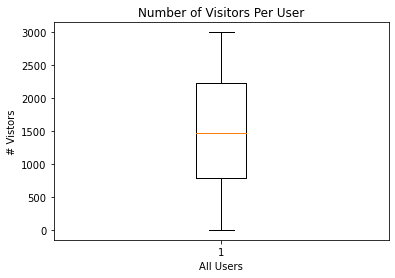

In [229]:
plt.boxplot(cleanDF['visit'])
plt.title("Number of Visitors Per User")
plt.ylabel("# Vistors")
plt.xlabel("All Users")
plt.show()

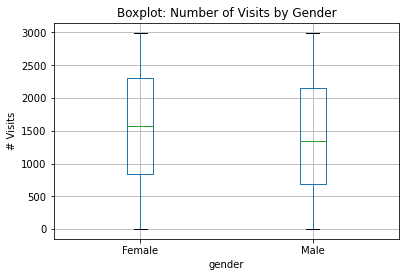

In [230]:
cleanDF.boxplot(column='visit', by='gender')
plt.title("Boxplot: Number of Visits by Gender")
plt.suptitle("")
plt.ylabel("# Visits")
plt.show()

7) Get rid of any outliers

In [243]:
# Start by finding the lowest and highest zscores
print("Lowest z score: {0:.4f}".format(stats.zscore(cleanDF['visit']).min()))
print("Highest z score: {0:.4f}".format(stats.zscore(cleanDF['visit']).max()))

Lowest z score: -1.7852
Highest z score: 1.7889


In [244]:
def removePercentiles(df, col, p):
    '''
     df: dataframe; 
    col: column name (str); 
      p: percent to remove from each end (upper, lower)
    '''
    lp =  p / 100
    up = 1 - lp
    uq = df[col].quantile(up)
    lq = df[col].quantile(lp)
    filteredDF = df[(df[col] < uq) & (df[col] > lq)]
    return filteredDF

In [245]:
nDF = removePercentiles(cleanDF, 'visit', 5)
nDF

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [247]:
sizeDict = {'numberOfRows': [cleanDF.shape[0], nDF.shape[0], cleanDF.shape[0]-nDF.shape[0]],
            'numberOfCols': [cleanDF.shape[1], nDF.shape[1], cleanDF.shape[1]-nDF.shape[1]],
            'sizeInBytes': [getsizeof(cleanDF), getsizeof(nDF), getsizeof(cleanDF)-getsizeof(nDF)]}
sizeDF = pd.DataFrame.from_dict(sizeDict, orient='index',
                               columns=['CleanedDF', 'NewDF_NoOutliers', 'SizeDifference'])

In [248]:
sizeDF

,CleanedDF,NewDF_NoOutliers,SizeDifference
numberOfRows,974,875,99
numberOfCols,7,7,0
sizeInBytes,320014,287487,32527


# Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):
a. Name, Address, City, State, Zip, Phone Number
b. Add at least 10 rows of data and submit your code with a query generating your results.

In [231]:
import sqlite3

In [257]:
query = """
CREATE TABLE data
(Name VARCHAR(20), Address VARCHAR(20),
 City VARCHAR(20), State   VARCHAR(20),
 Zip  INTEGER,    Phone_Number INTEGER
 );
"""

In [258]:
conn = sqlite3.connect('mydata.sqlite')

In [259]:
conn.execute("DROP table IF EXISTS data")

In [260]:
conn.execute(query)

In [261]:
conn.commit()

In [262]:
import random

In [263]:
def rand(num):
    return random.randrange(10**(num-1), (10**num)-1)

In [264]:
# Name, Address, City, State, Zip, Phone Number
data = [
('John Stamos', '{} Main Street'.format(rand(4)), 'Tulsa', 'Ok', rand(5), rand(10)),
('Larry Bird', '{} Main Street'.format(rand(4)), 'Phoneix', 'AZ', rand(5), rand(10)),
('Nick Mullen', '{} Main Street'.format(rand(4)), 'Kansas City', 'KS', rand(5), rand(10)),
('Stavros Halikas', '{} Main Street'.format(rand(4)), 'Omaha', 'NE', rand(5), rand(10)),
('Tim Pool', '{} Main Street'.format(rand(4)), 'Chicago', 'Il', rand(5), rand(10)),
('Elon Musk', '{} Main Street'.format(rand(4)), 'Moonville', 'Mars', rand(5), rand(10)),
('Joe Rogan', '{} Main Street'.format(rand(4)), 'Houston', 'TX', rand(5), rand(10)),
('Abigale Vontedue', '{} Main Street'.format(rand(4)), 'Thrustan', 'NM', rand(5), rand(10)),
('Scary Larry', '{} Main Street'.format(rand(4)), 'Springfield', 'Il', rand(5), rand(10)),
('Gay Terry', '{} Main Street'.format(rand(4)), 'Reno', 'NV', rand(5), rand(10)),
]


In [265]:
stmt = "INSERT INTO data VALUES( ?, ?, ?, ?, ?, ?)"

In [266]:
conn.executemany(stmt, data)

In [267]:
conn.commit()

In [268]:
cursor = conn.execute('select * from data')

In [269]:
rows = cursor.fetchall()

In [273]:
data_df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [274]:
data_df

,Name,Address,City,State,Zip,Phone_Number
0,John Stamos,7419 Main Street,Tulsa,Ok,94332,4089236401
1,Larry Bird,5573 Main Street,Phoneix,AZ,94830,3916657149
2,Nick Mullen,2945 Main Street,Kansas City,KS,69161,2359580197
3,Stavros Halikas,9345 Main Street,Omaha,NE,49902,1437416376
4,Tim Pool,1642 Main Street,Chicago,Il,63415,4512419563
5,Elon Musk,5547 Main Street,Moonville,Mars,31343,6179536498
6,Joe Rogan,3773 Main Street,Houston,TX,53535,6298339539
7,Abigale Vontedue,5524 Main Street,Thrustan,NM,81186,7225292092
8,Scary Larry,4403 Main Street,Springfield,Il,74928,6324487650
9,Gay Terry,1892 Main Street,Reno,NV,47294,2110551805
